<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 2

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">O teste de antígeno prostático específico (PSA) é frequentemente usado para se detectar a possibilidade de câncer de próstata. O nível de PSA maior que 4 ng/ml(nanograma/mililitro) é considerado anormal, mas a taxa de variação também é importante. Abaixo estão os níveis hipotéticos de PSA de um paciente durante um período de 3 anos. O valor máximo do PSA é menor que 4,0 ng/ml, mas a taxa de aumento é preocupante?</div>

| Tempo (anos)|PSA (ng/ml)|
|:-:	|:-:	|
|0|1,0|
|1|1,1|
|2|1,4|
|3|1,9|

<br><div style="text-align: justify">a) O aumento no PSA ocorre a uma taxa crescente ou decrescente? Demonstre.
<br>b) Quanto tempo leva para o PSA atingir 4 ng/ml?</div>

---

importing notebook from /Users/nallin/Dropbox/IE325Z/Listas/Lista 1/modules/IE325.ipynb


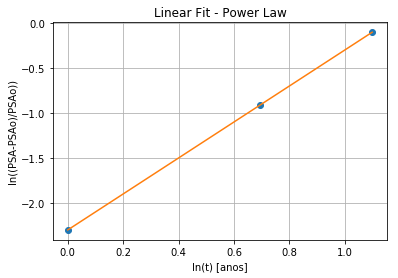

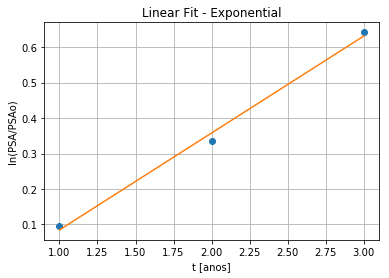

In [1]:
import matplotlib.pyplot as plt
import notebook_importer
from modules import IE325


# ----- Dados
tempo_anos = [0, 1, 2, 3]
psa = [1.0, 1.1, 1.4, 1.9]

PL = IE325.PowerLaw(tempo_anos, psa)
EL = IE325.ExponentialLaw(tempo_anos, psa)

    
# --------------------------------------------------------
# LINEAR FIT
# --------------------------------------------------------
# ----- Dados linearizados
xlin,ylin = PL.LinearData()
xlin2,ylin2 = EL.LinearData()

# ----- Plot Power Law Linear Fit  
plt.plot(xlin,ylin,'o', xlin, PL.LinearFit())
plt.title('Linear Fit - Power Law')
plt.xlabel('ln(t) [anos]')
plt.ylabel('ln((PSA-PSAo)/PSAo))')
plt.grid()
fig = plt.gcf()
plt.show() 

# ----- Plot Exponencial Linear Fit   
plt.plot(xlin2,ylin2,'o', xlin2, EL.LinearFit())
plt.title('Linear Fit - Exponential')
plt.xlabel('t [anos]')
plt.ylabel('ln(PSA/PSAo)')
plt.grid()
fig = plt.gcf()
plt.show() 

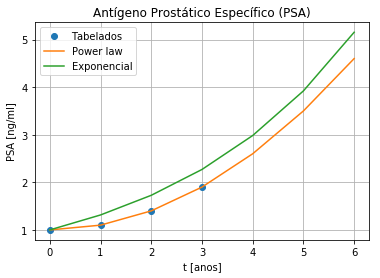

In [2]:
# --------------------------------------------------------
# SERIE ORIGINAL DE DADOS
# --------------------------------------------------------

# ----- Expansao dos Dados
# Sequencia original de dados + expansão para 6 anos
tempo_anos_expansao = tempo_anos + [4, 5, 6]
data = PL.Find_S(tempo_anos_expansao)
data2 = EL.Find_S(tempo_anos_expansao)
    
# ----- Plot    
plt.plot(tempo_anos,psa,'o', tempo_anos_expansao, data, tempo_anos_expansao, data2)
plt.title('Antígeno Prostático Específico (PSA)')
plt.legend(["Tabelados","Power law","Exponencial"])
plt.xlabel('t [anos]')
plt.ylabel('PSA [ng/ml]')
plt.grid()
fig = plt.gcf()
plt.show()

Observa-se pela análise acima, onde os dados são aproximados pelas leis de potência e exponenciais, que a lei válida que deverá ser aplicada ao restante desta análise é a **LEI DE POTÊNCIA**


---
**EQUAÇÃO DE REGIMENTO**

In [3]:
# ----- Equacao
print("Equação de regimento:")
print("PSA(t) = " + PL.LawComplete(decimal=1) + " [ng/ml]")
print("PSA(t) = " + PL.LawSimple(decimal=1) + " [ng/ml]")

Equação de regimento:
PSA(t) = 1.0 * (1 + 1.0e-01 * t^2.0e+00) [ng/ml]
PSA(t) = 1.0 + 1.0e-01 * t^2.0e+00 [ng/ml]


---
**TAXA DE CRESCIMENTO DO PSA**

In [4]:
# --------------------------------------------------------
# TAXA DE CRESCIMENTO DO PSA
# d(PSA)/dt = PSAo.n.Ao.tˆ(n-1)
# --------------------------------------------------------
print("Taxa de crescimento do PSA")
print("d(PSA)/dt = d(" + PL.LawSimple(decimal=1) + ")dt")

Aod, nd = PL.Law_dSdt()
print("d(PSA)/dt = " + str(Aod) + "*t^" + str(nd))

Taxa de crescimento do PSA
d(PSA)/dt = d(1.0 + 1.0e-01 * t^2.0e+00)dt
d(PSA)/dt = 0.2*t^1.0


Podemos ver, pela análise acima, que a taxa de crescimento do PSA é ** *crescente* **!


---
** QUANDO O PSA ATINGE 4ng/ml?**

Sabendo-se da equação de regimento do problema, como apresentado anteriormente, é possível estimar em quanto tempo o psa chega em **4ng/ml**

$PSA(t) = 1 + 0.1 . t^{2}$

$t = \sqrt[2]{\frac{(PSA - 1)}{0.1}}$

Utilizando a função já pronta para a identificação do tempo de um determinado S criada para a POWER-LAW:








In [5]:
# PSA A 4ng/ml EM QUANTO TEMPO?

print (PL.Find_t(S=4))

5.47722557505


O tempo para o PSA atingir o valor de 4 ng/ml é de, aproximadamente, **5.48 anos**!

---

##### Variáveis Associadas

In [2]:
print(PL.Variables())
print(EL.Variables())



Linear Fit Variables - Power Law:

a (slope coef) = 2.0
b (intercept coef) = -2.30258509299
r_value (correlation coefficient) = 1.0
std_err (standard error) = 0.0


Power Law Variables:

Ao = 0.1
n = 2.0



Linear Fit Variables - Exponential Law:

a (slope coef) = 0.273271853184
b (intercept coef) = -0.188664938835
r_value (correlation coefficient) = 0.997706819851
std_err (standard error) = 0.0185385995762

Exponential Law Variables:

Ao = 0.273271853184
